In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt

# read in the json files
portfolio = pd.read_json('/Users/samuelmilazzo/Desktop/samuel 2023/learning/capstoneproject/portfolio.json', orient='records', lines=True)
profile = pd.read_json('/Users/samuelmilazzo/Desktop/samuel 2023/learning/capstoneproject/profile.json', orient='records', lines=True)
transcript = pd.read_json('/Users/samuelmilazzo/Desktop/samuel 2023/learning/capstoneproject/transcript.json', orient='records', lines=True)

In [2]:
"""The basic task is to use the data to identify which groups of people are most responsive to each type of offer,
and how best to present each type of offer."""

'The basic task is to use the data to identify which groups of people are most responsive to each type of offer,\nand how best to present each type of offer.'

In [3]:
"""PORTFOLIO DATASET:
    Offers sent during 30-day test period (10 offers x 6 fields)

    reward: (numeric) money awarded for the amount spent
    channels: (list) web, email, mobile, social
    difficulty: (numeric) money required to be spent to receive reward
    duration: (numeric) time for offer to be open, in days
    offer_type: (string) bogo, discount, informational
    id: (string/hash)
"""
# starting with the exploration analysis of the Portfolio dataset 
portfolio.head()
# print(portfolio.columns)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


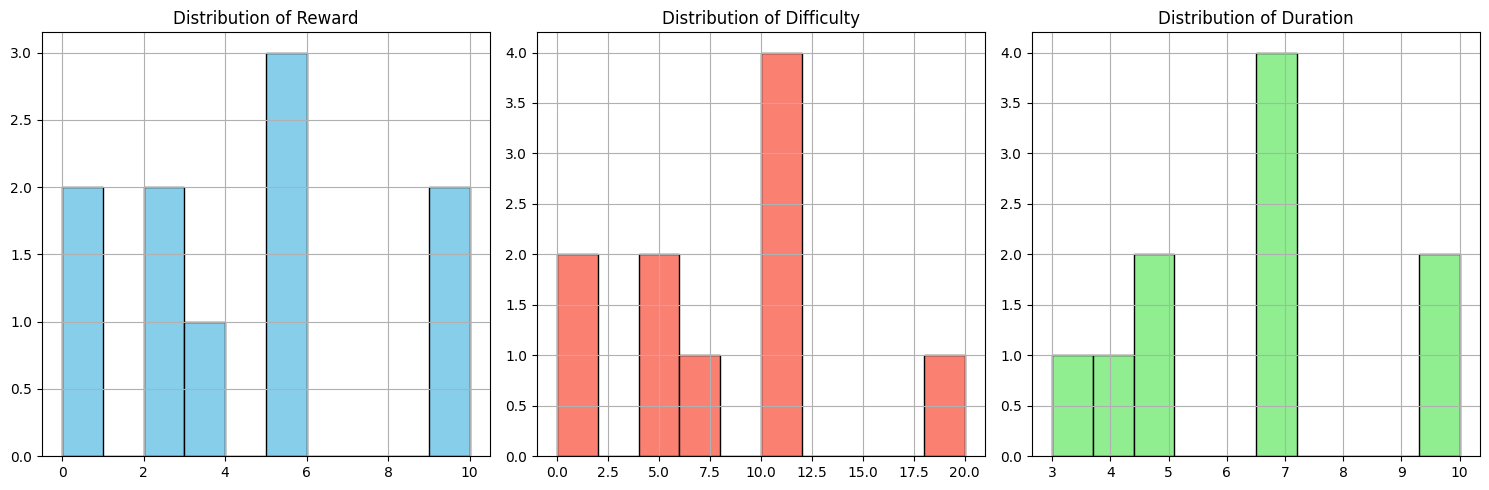

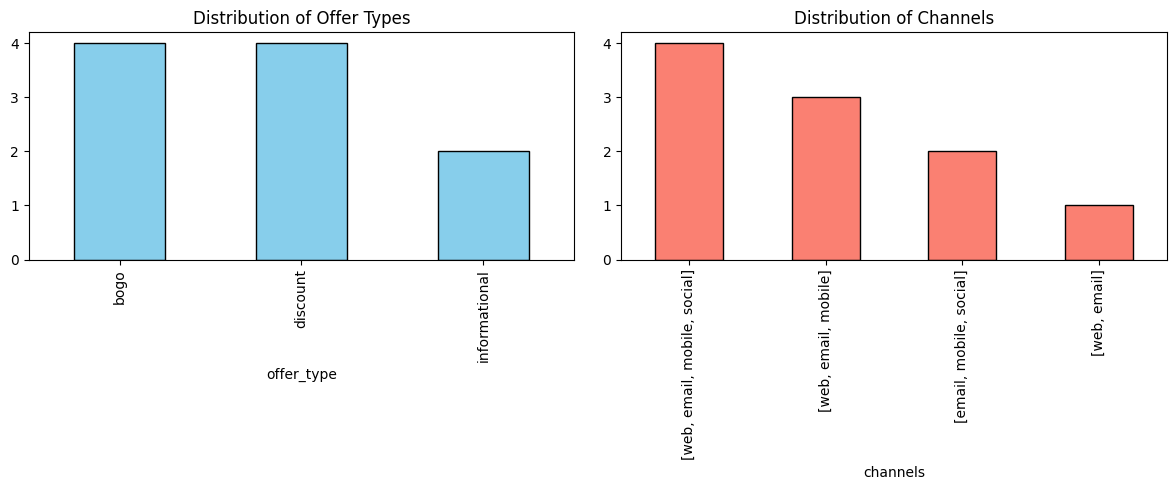

In [4]:
# Analysis of dataframe portfolio

# Distribution of numerical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

portfolio['reward'].hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Reward')

portfolio['difficulty'].hist(ax=axes[1], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Difficulty')

portfolio['duration'].hist(ax=axes[2], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Duration')

plt.tight_layout()
plt.show()

# Distribution of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

portfolio['offer_type'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Offer Types')

portfolio['channels'].value_counts().plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Channels')

plt.tight_layout()
plt.show()


In [ ]:
"""PROFILE DATASET ANALYSIS

    profile.json
    Rewards program users (17000 users x 5 fields)

    gender: (categorical) M, F, O, or null
    age: (numeric) missing value encoded as 118
    id: (string/hash)
    became_member_on: (date) format YYYYMMDD
    income: (numeric)
"""

                age               became_member_on         income
count  17000.000000                          17000   14825.000000
mean      62.531412  2017-02-23 13:12:10.164706048   65404.991568
min       18.000000            2013-07-29 00:00:00   30000.000000
25%       45.000000            2016-05-26 00:00:00   49000.000000
50%       58.000000            2017-08-02 00:00:00   64000.000000
75%       73.000000            2017-12-30 00:00:00   80000.000000
max      118.000000            2018-07-26 00:00:00  120000.000000
std       26.738580                            NaN   21598.299410


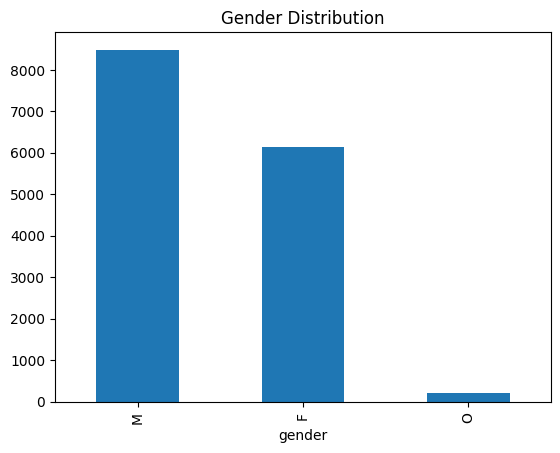

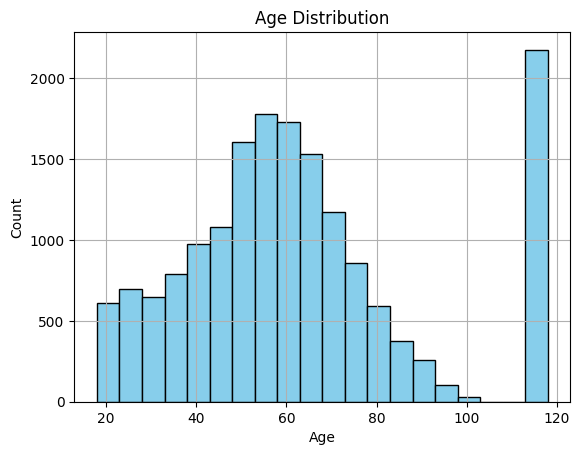

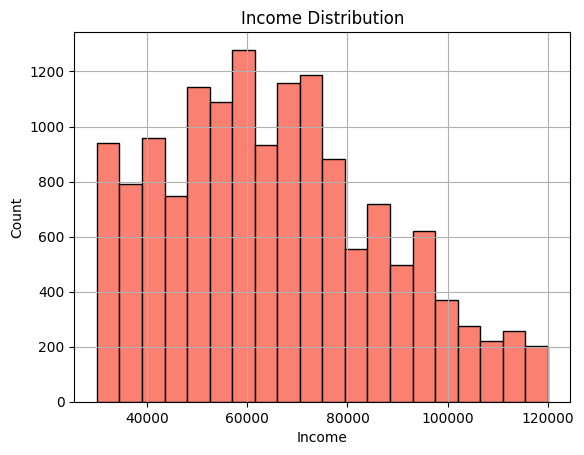

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Analiysis of first rows DataFrame "profile"
# print(profile.head())

# statistic
print(profile.describe())

# Converti la colonna 'became_member_on' in formato datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Demographic exploration
profile['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

profile['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

profile['income'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()





In [11]:
"""TRANSCRIPT DATAFRAME

    Event log (306648 events x 4 fields)

    person: (string/hash)
    event: (string) offer received, offer viewed, transaction, offer completed
    value: (dictionary) different values depending on event type
    offer id: (string/hash) not associated with any "transaction"
    amount: (numeric) money spent in "transaction"
    reward: (numeric) money gained from "offer completed"
    time: (numeric) hours after start of test
"""

transcript.head()
# print(transcript.columns)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


/var/folders/4f/fq9kc5xx1y78h2_0j3g4mhg40000gn/T/ipykernel_23817/3006159675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['amount'] = transactions['value'].apply(lambda x: x['amount'])


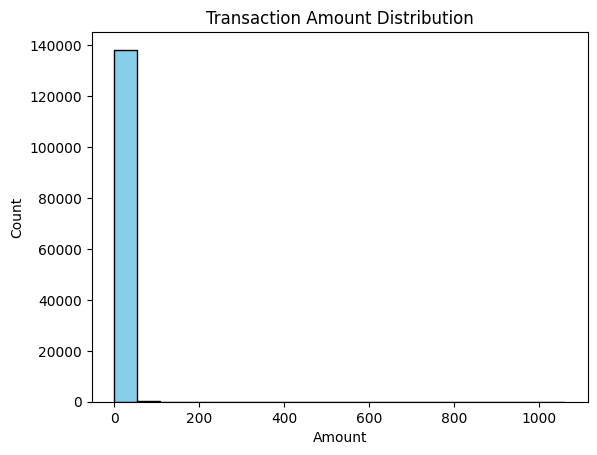

In [12]:
# Filter rows with "transaction" event
transactions = transcript[transcript['event'] == 'transaction']

# Extract transaction information from 'value' column
transactions['amount'] = transactions['value'].apply(lambda x: x['amount'])

# Plot the histogram to explore the distribution of transactions
plt.hist(transactions['amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [13]:
# analysis of event types and distribution

event_counts = transcript['event'].value_counts()
print("#distribution of events in dataset transcript:")
print(event_counts)


"""Transactions: They are the most common event type in the "transcript" dataset, with 138,953 transactions recorded. This suggests that the majority of customer activities involve the purchase of products or services.

Offers Received: There are 76,277 offers received, which indicates that offers were sent to a significant number of customers during the study.

Offers Viewed: With 57,725 offers viewed, we know that a good portion of the offers submitted were actually viewed by customers. This gives us an idea of ​​the engagement rate of the offers.

Completed Deals: With 33,579 completed deals, we see that a significant number of submitted deals were also completed by customers. This helps us understand how effective bids are at generating conversions.

This analysis provides an overview of the interactions between users and offers in the "transcript" dataset, which can be useful for further analysis and to better understand customer behavior."""


"""Transazioni: Sono il tipo di evento più comune nel dataset "transcript", con 138.953 transazioni registrate. Questo suggerisce che la maggior parte delle attività dei clienti coinvolge l'acquisto di prodotti o servizi.

Offerte ricevute: Ci sono 76.277 offerte ricevute, il che indica che le offerte sono state inviate a un numero significativo di clienti durante lo studio.

Offerte visualizzate: Con 57.725 offerte visualizzate, sappiamo che una buona parte delle offerte inviate è stata effettivamente visualizzata dai clienti. Questo ci offre un'idea del tasso di coinvolgimento delle offerte.

Offerte completate: Con 33.579 offerte completate, vediamo che un numero significativo di offerte inviate è stata anche portata a termine dai clienti. Questo ci aiuta a comprendere quanto le offerte siano efficaci nel generare conversioni.

Questa analisi fornisce una panoramica delle interazioni tra gli utenti e le offerte nel dataset "transcript", che può essere utile per ulteriori analisi e per comprendere meglio il comportamento dei clienti."""



#distribution of events in dataset transcript:
event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64


'Transazioni: Sono il tipo di evento più comune nel dataset "transcript", con 138.953 transazioni registrate. Questo suggerisce che la maggior parte delle attività dei clienti coinvolge l\'acquisto di prodotti o servizi.\n\nOfferte ricevute: Ci sono 76.277 offerte ricevute, il che indica che le offerte sono state inviate a un numero significativo di clienti durante lo studio.\n\nOfferte visualizzate: Con 57.725 offerte visualizzate, sappiamo che una buona parte delle offerte inviate è stata effettivamente visualizzata dai clienti. Questo ci offre un\'idea del tasso di coinvolgimento delle offerte.\n\nOfferte completate: Con 33.579 offerte completate, vediamo che un numero significativo di offerte inviate è stata anche portata a termine dai clienti. Questo ci aiuta a comprendere quanto le offerte siano efficaci nel generare conversioni.\n\nQuesta analisi fornisce una panoramica delle interazioni tra gli utenti e le offerte nel dataset "transcript", che può essere utile per ulteriori ana

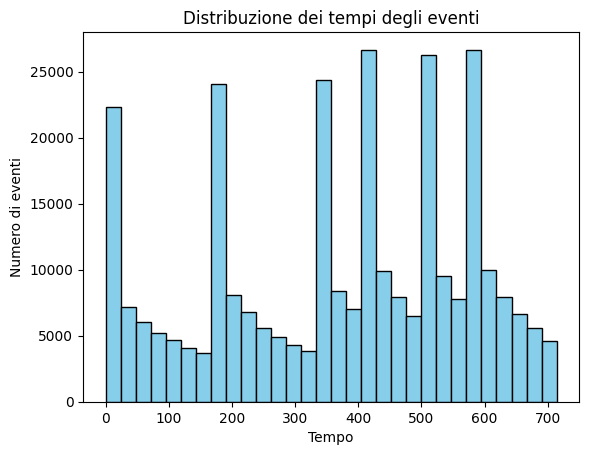

In [9]:
# Analysis of distributions
plt.hist(transcript['time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution ')
plt.xlabel('time')
plt.ylabel('number of events')
plt.show()


In [ ]:
# Merging 

In [14]:
# Union between transcript and profile
transcript_profile = pd.merge(transcript, profile, left_on='person', right_on='id', how='left')

# Remove duplicate column 'id' from transcript_profile
transcript_profile.drop(columns=['id'], inplace=True)

# View the new dataframe
print(transcript_profile.head())



                             person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time gender  age  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0      F   75   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   None  118   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0      M   68   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   None  118   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   None  118   

  became_member_on    income  
0       2017-05-09  100000.0  
1       2017-08-04       NaN  
2       2018-04-26   70000.0  
3       2017-09-25       NaN  
4       2017-10-02       NaN  


In [15]:
# transcript_profile contains the 'value' column with offer IDs
# portfolio contains the 'id' column with offer IDs

# Extract the offer ID from the 'value' column
transcript_profile['offer_id'] = transcript_profile['value'].apply(lambda x: x.get('offer id'))

# Merge the dataframes using the offer ID as the merge key
merged_df = pd.merge(transcript_profile, portfolio, left_on='offer_id', right_on='id', how='left')

# Remove any duplicate columns
merged_df.drop(columns=['id'], inplace=True)

# Display the first few rows of the merged dataframe to verify the merge
# print(merged_df.head())

merged_df.shape[0]

# So now we have a dataframe with all transactions and their respective profile and offer data


306534

In [16]:
# DATA CLEANING

# merged_df = merged_df.drop(columns=['value']) --> delete the 'value' column because it's the same as offer id
# merged_df.loc[merged_df['age'] >= 100, 'age'] = median_age --> adjust the dataset
# merged_df.fillna(merged_df.mean(), inplace=True)
# Count the total number of rows in the dataframe
total_rows = len(merged_df)

# Count the number of rows with null values
rows_with_null = merged_df.isnull().any(axis=1).sum()

# Calculate the difference between the total rows and rows with null values
difference = total_rows - rows_with_null

# Print the results
print("Total number of rows in the dataframe:", total_rows)
print("Number of rows with null values:", rows_with_null)
print("Difference between total and rows with null values:", difference)

# Create a new dataframe without rows with null values
merged_df_nonull = merged_df.dropna()

# Check the dimensions of the new dataframe
print("Dimensions of merged_df_nonull after removing null values:", merged_df_nonull.shape)

# merged_df.head()
# merged_df.shape[0]


Total number of rows in the dataframe: 306534
Number of rows with null values: 190173
Difference between total and rows with null values: 116361
Dimensions of merged_df_nonull after removing null values: (116361, 14)


In [23]:
#check merged_df_nonull[merged_df_nonull['person'] == '94de646f7b6041228ca7dec82adb97d2']

,person,event,value,time,gender,age,became_member_on,income,offer_id,reward,channels,difficulty,duration,offer_type
2276,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,M,27,20140126,33000.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
16010,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6,M,27,20140126,33000.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
55475,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168,M,27,20140126,33000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo
75256,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},186,M,27,20140126,33000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo
113102,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,M,27,20140126,33000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount
152891,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408,M,27,20140126,33000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"[web, email, mobile, social]",10.0,10.0,discount
164148,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408,M,27,20140126,33000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"[web, email, mobile, social]",10.0,10.0,discount
203846,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},504,M,27,20140126,33000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo
222483,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},516,M,27,20140126,33000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo
247375,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,M,27,20140126,33000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding of the 'gender' feature
features = pd.get_dummies(merged_df_nonull[['age', 'income', 'duration', 'gender']])

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Choose the number of clusters
num_clusters = 3

# Perform K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_features)

# Add cluster labels to the dataframe
merged_df_nonull['cluster'] = cluster_labels

# Display the results
print(merged_df_nonull.head()) 



                             person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
5  389bc3fa690240e798340f5a15918d5c  offer received   
7  2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8  aa4862eba776480b8bb9c68455b8c2e1  offer received   

                                              value  time gender  age  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0      F   75   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0      M   68   
5  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}     0      M   65   
7  {'offer id': '3f207df678b143eea3cee63160fa8bed'}     0      M   58   
8  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0      F   61   

  became_member_on    income                          offer_id  reward  \
0       2017-05-09  100000.0  9b98b8c7a33c4b65b9aebfe6a799e6d9     5.0   
2       2018-04-26   70000.0  2906b810c7d4411798c6938adc9daaa5     2.0   
5       

/var/folders/4f/fq9kc5xx1y78h2_0j3g4mhg40000gn/T/ipykernel_23817/340045104.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nonull['cluster'] = cluster_labels


In [18]:
# Analyze the characteristics of each cluster
cluster_analysis = merged_df_nonull.groupby('cluster').agg({
    'age': 'mean',               # Mean age
    'income': 'mean',            # Mean income
    'offer_type': lambda x: x.mode(),  # Most common offer type in the cluster
    'reward': 'mean',            # Mean reward
    'difficulty': 'mean',        # Mean offer difficulty
    'duration': 'mean'           # Mean offer duration
}).reset_index()

# Print the cluster analysis
print(cluster_analysis)



   cluster        age        income offer_type    reward  difficulty  duration
0        0  52.370747  61311.733864       bogo  4.016995    4.016995  4.276876
1        1  57.378643  70900.542749       bogo  4.283952    7.492700  6.428091
2        2  52.273527  61751.876209   discount  4.526757    9.974468  7.973617
